In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

from propagation.logfiles import outfiles, parse_files

%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
supermuc=outfiles('out/supermuc/out/')
sm = parse_files(supermuc)
sm.to_csv('supermuc.csv')

aborted: jobid
1419470     out-opt-neos-25_1419470-20210925T1606.txt
1419555    out-opt-fpoe-400_1419555-20210926T0126.txt
1419789      out-opt-sd-400_1419789-20210926T1040.txt
1419794      out-opt-sd-400_1419794-20210926T1115.txt
1420324    out-opt-fpoe-625_1420324-20210927T1026.txt
1420330    out-opt-fpoe-625_1420330-20210927T0951.txt
1421599     out-test-sd-625_1421599-20210928T0115.txt
Name: filename, dtype: object


In [5]:
hawk=outfiles('out/hawk/old-out')
ha = parse_files(hawk)
ha.to_csv('hawk.csv')

aborted: Series([], Name: filename, dtype: object)


In [6]:
r=sm
r[r.topic.str.contains('neos' )] [['date', 'nodes', 'runtime', 'gridsize', 'samples', 'sources']]

,date,nodes,runtime,gridsize,samples,sources
jobid,,,,,,
1418943,2021-09-24 16:41:29.915998,1,0.232791,<NA>,1,1
1419012,2021-09-24 17:57:30.273688,1,23.142297,<NA>,1,1
1419013,2021-09-24 18:00:32.385254,1,9.03516,<NA>,1,1
1419014,2021-09-24 18:03:53.329167,1,237.072808,<NA>,1000,400
1419019,2021-09-24 18:12:22.345396,1,96.023783,<NA>,1000,400
1419055,2021-09-24 22:16:49.255942,32,1229.34119,<NA>,1000,400
1419185,2021-09-24 23:10:36.760584,1,293.171803,<NA>,1000,400
1419376,2021-09-25 12:23:13.083168,16,1.256643,<NA>,1,1
1419382,2021-09-25 12:33:21.021817,16,3.264445,<NA>,1,1


In [7]:
r=r[~r.graph.str.contains('inner')]
r[(r.command=='optimize') & (r.sources==64) & r.topic.str.contains('fpoe')][['code_version','topic','sources','samples','nodes','runtime']]

,code_version,topic,sources,samples,nodes,runtime
jobid,,,,,,
1336118.hawk-pbs5,v0.2-19-gd094223-dirty,fpoe_20201110,64,500,1,44575.961342
1336184.hawk-pbs5,v0.2-23-g5e9472f,fpoe,64,1000,16,6350.919478
1336200.hawk-pbs5,v0.2-24-g01c3ff5-dirty,fpoe,64,1000,16,15130.526506
1336904.hawk-pbs5,v0.2-25-gdf92be1-dirty,fpoe,64,1000,16,15447.69132
1341842.hawk-pbs5,v0.2-33-g7d78804,fpoe,64,1000,32,7527.317517
1349846.hawk-pbs5,v0.2-37-g9665f46-dirty,fpoe,64,1000,8,12254.798209


In [7]:
c=r.groupby(['params']).agg(list)#[['runid','file','command','nodes','topic','mae_mean_retweets','mape_mean_retweets','runtime', 'totaltime']]
c

,filename,file,mpi_size,code_version,runid,graph,metis_zero_based,tweets,stats,discount,corr,source_map,indir,outdir,features,sources,samples,epsilon,max_depth,max_nodes,sample_split,seed,command,topic,setuptime,cfeatures,csources,csamples,mae_retweet_probability,mae_mean_retweets,mape_retweet_probability,mape_mean_retweets,runtime,totaltime,nodes,mpiprocs,walltime,grid,opt
params,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
data/params-fpoe-1336184.hawk-pbs5.csv,[out-val-opt-fpoe_1336184_1349664.hawk-pbs5-20...,[/Users/ian/duck/hawk/propagation/out/val-opt-...,"[128, 128, 128, 128, 128]","[v0.2-36-g4a586af, v0.2-36-g4a586af, v0.2-36-g...","[val-opt-fpoe_1336184_1349664.hawk-pbs5, val-o...","[data/anon_graph_outer_fpoe_20201110.npz, data...","[False, False, False, False, False]","[data/sim_features_fpoe_20201110.csv, data/sim...","[None, None, None, None, None]","[None, None, None, None, None]","[None, None, None, None, None]","[None, None, None, None, None]","[data, data, data, data, data]","[out/val-opt-fpoe_1336184_1349664.hawk-pbs5, o...","[1, 1, 1, 1, 1]","[256, 256, 256, 256, 256]","[1000, 1000, 1000, 1000, 1000]","[0.001, 0.001, 0.001, 0.001, 0.001]","[None, None, None, None, None]","[None, None, None, None, None]","[1, 1, 1, 1, 1]","[7307542624271592120524815829818083312, 130889...","[val, val, val, val, val]","[fpoe_20201110, fpoe_20201110, fpoe_20201110, ...","[0.6573467254638672, 0.6310756206512451, 0.647...","[132.0, 132.0, 132.0, 132.0, 132.0]","[256.0, 256.0, 256.0, 256.0, 256.0]","[1000.0, 1000.0, 1000.0, 1000.0, 1000.0]","[0.0007364307029249952, 0.0006701783885747995,...","[1.965474746148062, 2.1525136436849266, 2.0555...","[0.00155561053028518, 0.0014156614523209152, 0...","[0.39535843397000764, 0.43298161166108395, 0.4...","[453.31926345825195, 457.4902033805847, 416.52...","[458.2801630496979, 462.43035793304443, 421.62...","[1, 1, 1, 1, 1]","[128.0, 128.0, 128.0, 128.0, 128.0]","[00:30:00, 00:30:00, 00:30:00, 00:30:00, 00:30...","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]"
data/params-fpoe-1336200.hawk-pbs5.csv,[out-val-opt-fpoe_1336200_1349669.hawk-pbs5-20...,[/Users/ian/duck/hawk/propagation/out/val-opt-...,"[128, 128, 128, 128, 128]","[v0.2-36-g4a586af, v0.2-36-g4a586af, v0.2-36-g...","[val-opt-fpoe_1336200_1349669.hawk-pbs5, val-o...","[data/anon_graph_outer_fpoe_20201110.npz, data...","[False, False, False, False, False]","[data/sim_features_fpoe_20201110.csv, data/sim...","[None, None, None, None, None]","[None, None, None, None, None]","[None, None, None, None, None]","[None, None, None, None, None]","[data, data, data, data, data]","[out/val-opt-fpoe_1336200_1349669.hawk-pbs5, o...","[1, 1, 1, 1, 1]","[256, 256, 256, 256, 256]","[1000, 1000, 1000, 1000, 1000]","[0.001, 0.001, 0.001, 0.001, 0.001]","[None, None, None, None, None]","[None, None, None, None, None]","[1, 1, 1, 1, 1]","[25366898047523012449478669373368697599, 27372...","[val, val, val, val, val]","[fpoe_20201110, fpoe_20201110, fpoe_20201110, ...","[0.6323072910308838, 0.6841506958007812, 0.642...","[132.0, 132.0, 132.0, 132.0, 132.0]","[256.0, 256.0, 256.0, 256.0, 256.0]","[1000.0, 1000.0, 1000.0, 1000.0, 1000.0]","[0.0007641439844230888, 0.0007078138421615523,...","[1.013027839968565, 1.0114451923554626, 1.0678...","[0.0016141510994873618, 0.0014951612717595609,...","[0.20377219354403264, 0.20345384140897282, 0.2...","[434.08879804611206, 412.9639859199524, 430.34...","[439.2147126197815, 418.07310152053833, 435.58...","[1, 1, 1, 1, 1]","[128.0, 128.0, 128.0, 128.0, 128.0]","[00:30:00, 00:30:00, 00:30:00, 00:30:00, 00:30...","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]"
out/opt-fpoe_1341842.hawk-pbs5/params-fpoe-opt-fpoe_1341842.hawk-pbs5.csv,[out-val-opt-fpoe_1341843.hawk-pbs5-20210831T2...,[/Users/ian/duck/hawk/propagation/out/val-opt-...,"[2048, 128, 128, 128, 128, 128, 128, 128, 128,...","[v0.2-33-g7d78804, v0.2-35-gb726c4d, v0.2-35-g...","[val-opt-fpoe_1341843.hawk-pbs5, val-opt-fpoe_...","[data/anon_graph_outer_fpo

In [ ]:
d=c[0:7]
d.mae_mean_retweets

In [47]:
newer = r[ (r.outdir!='out') & r.graph.str.contains('outer') & r.outdir.str.contains('1349') ].copy()
newer.params=newer.params.str.replace(r'^out/opt-|(data/)?params-|\.hawk-pbs5.*','', regex=True)
newer.discount=newer.discount.str.replace(r'^out/|data/|\.hawk-pbs5.*','', regex=True)
newer.params.fillna(newer.discount, inplace=True)
best = newer[ (newer.sources==256) & (newer.samples==1000) ]

In [50]:
best.groupby('params').describe().mae_mean_retweets
# newer[newer.params=='out/opt-neos_1349701.hawk-pbs5/params-neos-opt-neos_1349701.hawk-pbs5.csv']
# newer

,count,mean,std,min,25%,50%,75%,max
params,,,,,,,,
discount-fpoe-1336748,3.0,0.834527,0.015820,0.821189,0.825788,0.830387,0.841196,0.852006
discount-fpoe_1349824,10.0,0.859966,0.033446,0.794281,0.851040,0.858064,0.881585,0.911765
discount-neos_1349679,10.0,0.476255,0.027179,0.432711,0.460410,0.477317,0.487883,0.528286
fpoe-1336184,5.0,2.061002,0.070380,1.965475,2.032279,2.055551,2.099193,2.152514
fpoe-1336200,5.0,1.030679,0.031753,0.999149,1.011445,1.013028,1.061962,1.067811
fpoe_1341842,8.0,0.958236,0.034738,0.929231,0.931122,0.941380,0.981793,1.021292
fpoe_1349846,18.0,1.262107,0.054211,1.132548,1.233002,1.257638,1.305965,1.341798
neos_1341840,7.0,0.619749,0.024407,0.593314,0.601972,0.617190,0.630005,0.663788
neos_1349701,19.0,0.878481,0.054808,0.794091,0.844815,0.863665,0.916730,1.000795


In [10]:
best[best.discount=='out/discount-neos_1349679.hawk-pbs5/discount-neos-discount-neos_1349679.hawk-pbs5.csv']

,filename,file,mpi_size,code_version,runid,graph,metis_zero_based,tweets,stats,params,discount,corr,source_map,indir,outdir,features,sources,samples,epsilon,max_depth,max_nodes,sample_split,seed,command,topic,setuptime,cfeatures,csources,csamples,mae_retweet_probability,mae_mean_retweets,mape_retweet_probability,mape_mean_retweets,runtime,totaltime,nodes,mpiprocs,walltime,grid,opt
jobid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1349682.hawk-pbs5,out-val-learn-discount-neos_1349679.hawk-pbs5_...,/Users/ian/duck/hawk/propagation/out/val-learn...,128,v0.2-37-g9665f46,val-learn-discount-neos_1349679.hawk-pbs5_1349...,data/anon_graph_outer_neos_20201110.npz,False,data/sim_features_neos_20201110.csv,None,None,out/discount-neos_1349679.hawk-pbs5/discount-n...,out/corr-neos_1349680.hawk-pbs5/corr-neos-corr...,None,data,out/val-learn-discount-neos_1349679.hawk-pbs5_...,1,256,1000,0.001,None,None,1,220083138409305045777522046437743114323,val,neos,1.934969,91.0,256.0,1000.0,0.000707,0.478723,0.001521,0.133414,79.925660,83.721715,1,128.0,00:30:00,NaN,NaN
1349684.hawk-pbs5,out-val-learn-discount-neos_1349679.hawk-pbs5_...,/Users/ian/duck/hawk/propagation/out/val-learn...,128,v0.2-37-g9665f46,val-learn-discount-neos_1349679.hawk-pbs5_1349...,data/anon_graph_outer_neos_20201110.npz,False,data/sim_features_neos_20201110.csv,None,None,out/discount-neos_1349679.hawk-pbs5/discount-n...,out/corr-neos_1349680.hawk-pbs5/corr-neos-corr...,None,data,out/val-learn-discount-neos_1349679.hawk-pbs5_...,1,256,1000,0.001,None,None,1,92533117586379005787923751125840951856,val,neos,1.783682,91.0,256.0,1000.0,0.000622,0.475910,0.001339,0.132630,78.926922,82.624550,1,128.0,00:30:00,NaN,NaN
1349686.hawk-pbs5,out-val-learn-discount-neos_1349679.hawk-pbs5_...,/Users/ian/duck/hawk/propagation/out/val-learn...,128,v0.2-37-g9665f46,val-learn-discount-neos_1349679.hawk-pbs5_1349...,data/anon_graph_outer_neos_20201110.npz,False,data/sim_features_neos_20201110.csv,None,None,out/discount-neos_1349679.hawk-pbs5/discount-n...,out/corr-neos_1349680.hawk-pbs5/corr-neos-corr...,None,data,out/val-learn-discount-neos_1349679.hawk-pbs5_...,1,256,1000,0.001,None,None,1,134527258448473665092425328243866836466,val,neos,1.831030,91.0,256.0,1000.0,0.000593,0.432711,0.001275,0.120591,79.479887,83.171851,1,128.0,00:30:00,NaN,NaN
1349688.hawk-pbs5,out-val-learn-discount-neos_1349679.hawk-pbs5_...,/Users/ian/duck/hawk/propagation/out/val-learn...,128,v0.2-37-g9665f46,val-learn-discount-neos_1349679.hawk-pbs5_1349...,data/anon_graph_outer_neos_20201110.npz,False,data/sim_features_neos_20201110.csv,None,None,out/discount-neos_1349679.hawk-pbs5/discount-n...,out/corr-neos_1349680.hawk-pbs5/corr-neos-corr...,None,data,out/val-learn-discount-neos_1349679.hawk-pbs5_...,1,256,1000,0.001,None,None,1,129003218176614802504736351350025751944,val,neos,1.857465,91.0,256.0,1000.0,0.000589,0.488615,0.001266,0.136171,77.410916,81.151689,1,128.0,00:30:00,NaN,NaN
1349690.hawk-pbs5,out-val-learn-discount-neos_1349679.hawk-pbs5_...,/Users/ian/duck/hawk/propagation/out/val-learn...,128,v0.2-37-g9665f46,val-learn-discount-neos_1349679.hawk-pbs5_1349...,data/anon_graph_outer_neos_20201110.npz,False,data/sim_features_neos_20201110.csv,None,None,out/discount-neos_1349679.hawk-pbs5/discount-n...,out/corr-neos_1349680.hawk-pbs5/corr-neos-corr...,None,data,out/val-learn-discount-neos_1349679.hawk-pbs5_...,1,256,1000,0.001,None,None,1,173854699929974669425862009669550654131,val,neos,1.953140,91.0,256.0,1000.0,0.000673,0.460049,0.001448,0.128210,82.957945,86.839067,1,128.0,00:30:00,NaN,NaN
1349692.hawk-pbs5,out-val-learn-discount-neos_1349679.hawk-pbs5_...,/Users/ian/duck/hawk/propagation/out/val-learn...,128,v0.2-37-g9665f46,val-learn-discount-neos_1349679.hawk-pbs5_1349...,data/anon_graph_outer_neos_20201110.npz,False,data/sim_features_neos_20201110.csv,None,None,out/discount-neos_1349679.hawk-pbs5/discount-n...,out/corr-neos_1349680.hawk-pbs5/corr-neos-corr...,None,data,out/val-learn-discount-neos_1349679.hawk-pbs5

<IPython.core.display.Javascript object>


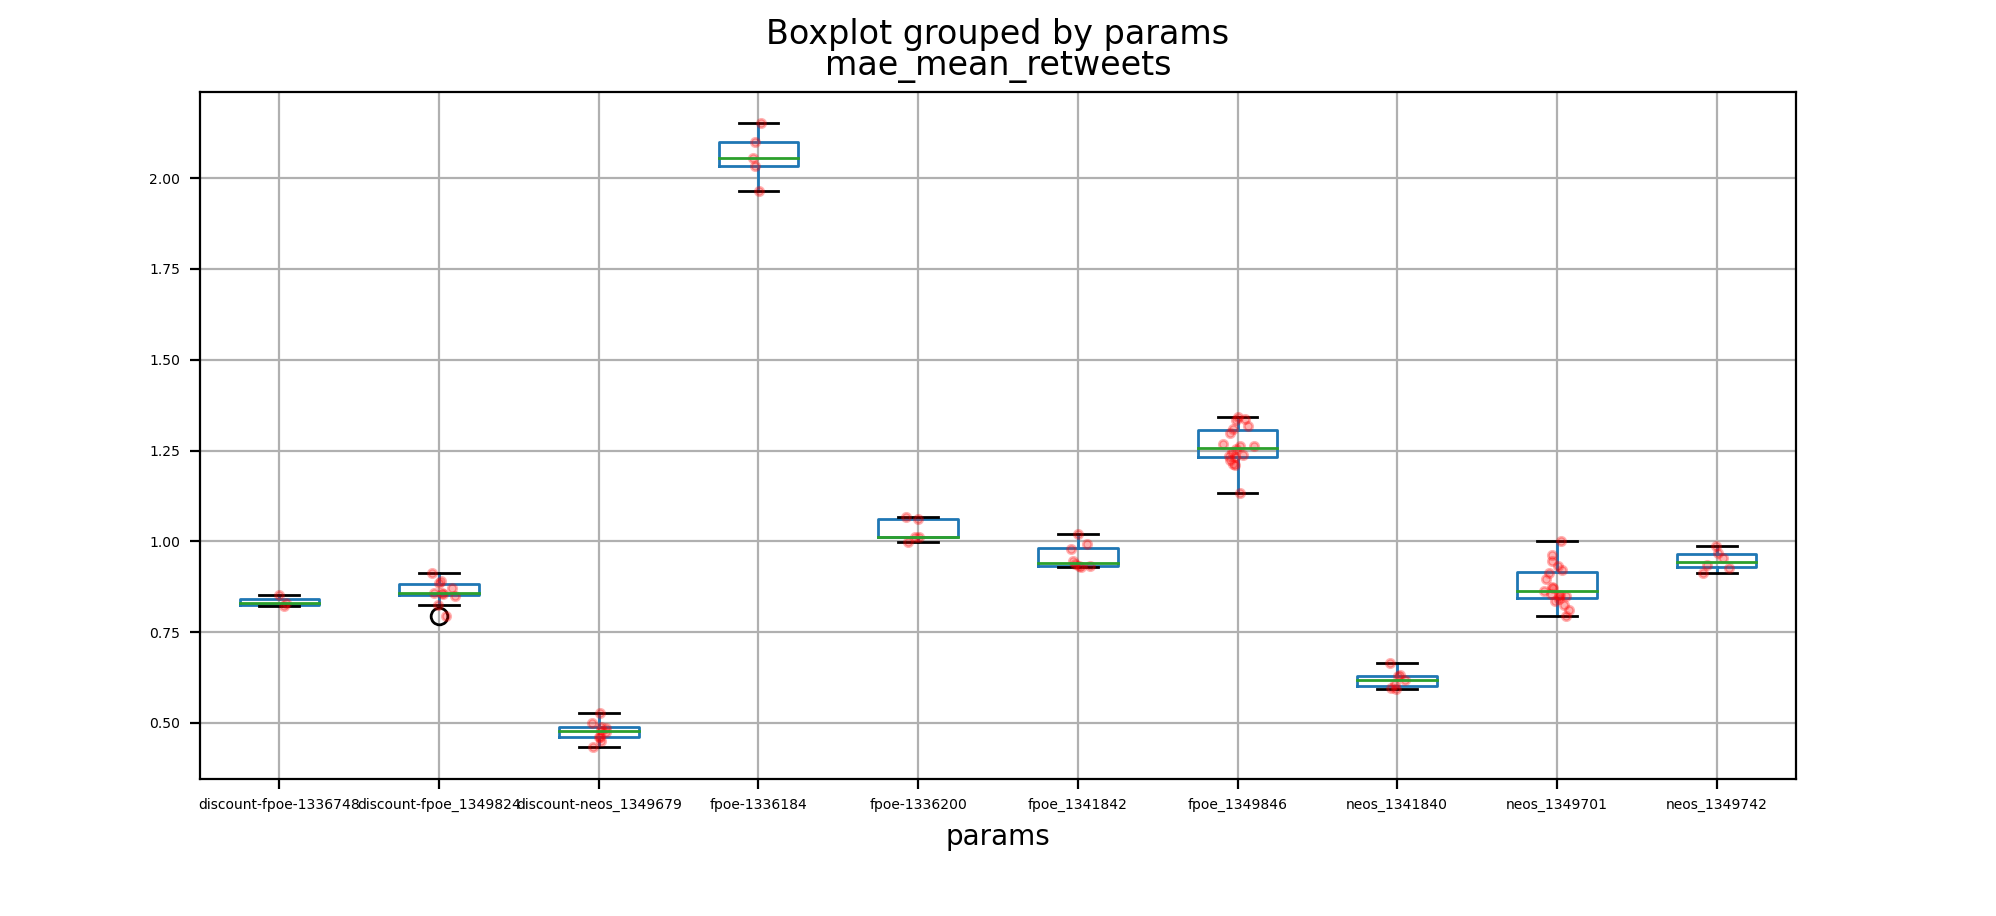

In [49]:
def boxscatter(df,by, column):
    df.boxplot(column=column, by=by, fontsize=5)
    for i, (c, v) in enumerate(df.groupby(by)):
        y = v[column].dropna()
        # Add some random "jitter" to the x-axis
        x = np.random.normal(i+1, 0.04, size=len(y))
        plt.plot(x, y, 'r.', alpha=0.3)
boxscatter(best,'params','mae_mean_retweets')

<IPython.core.display.Javascript object>


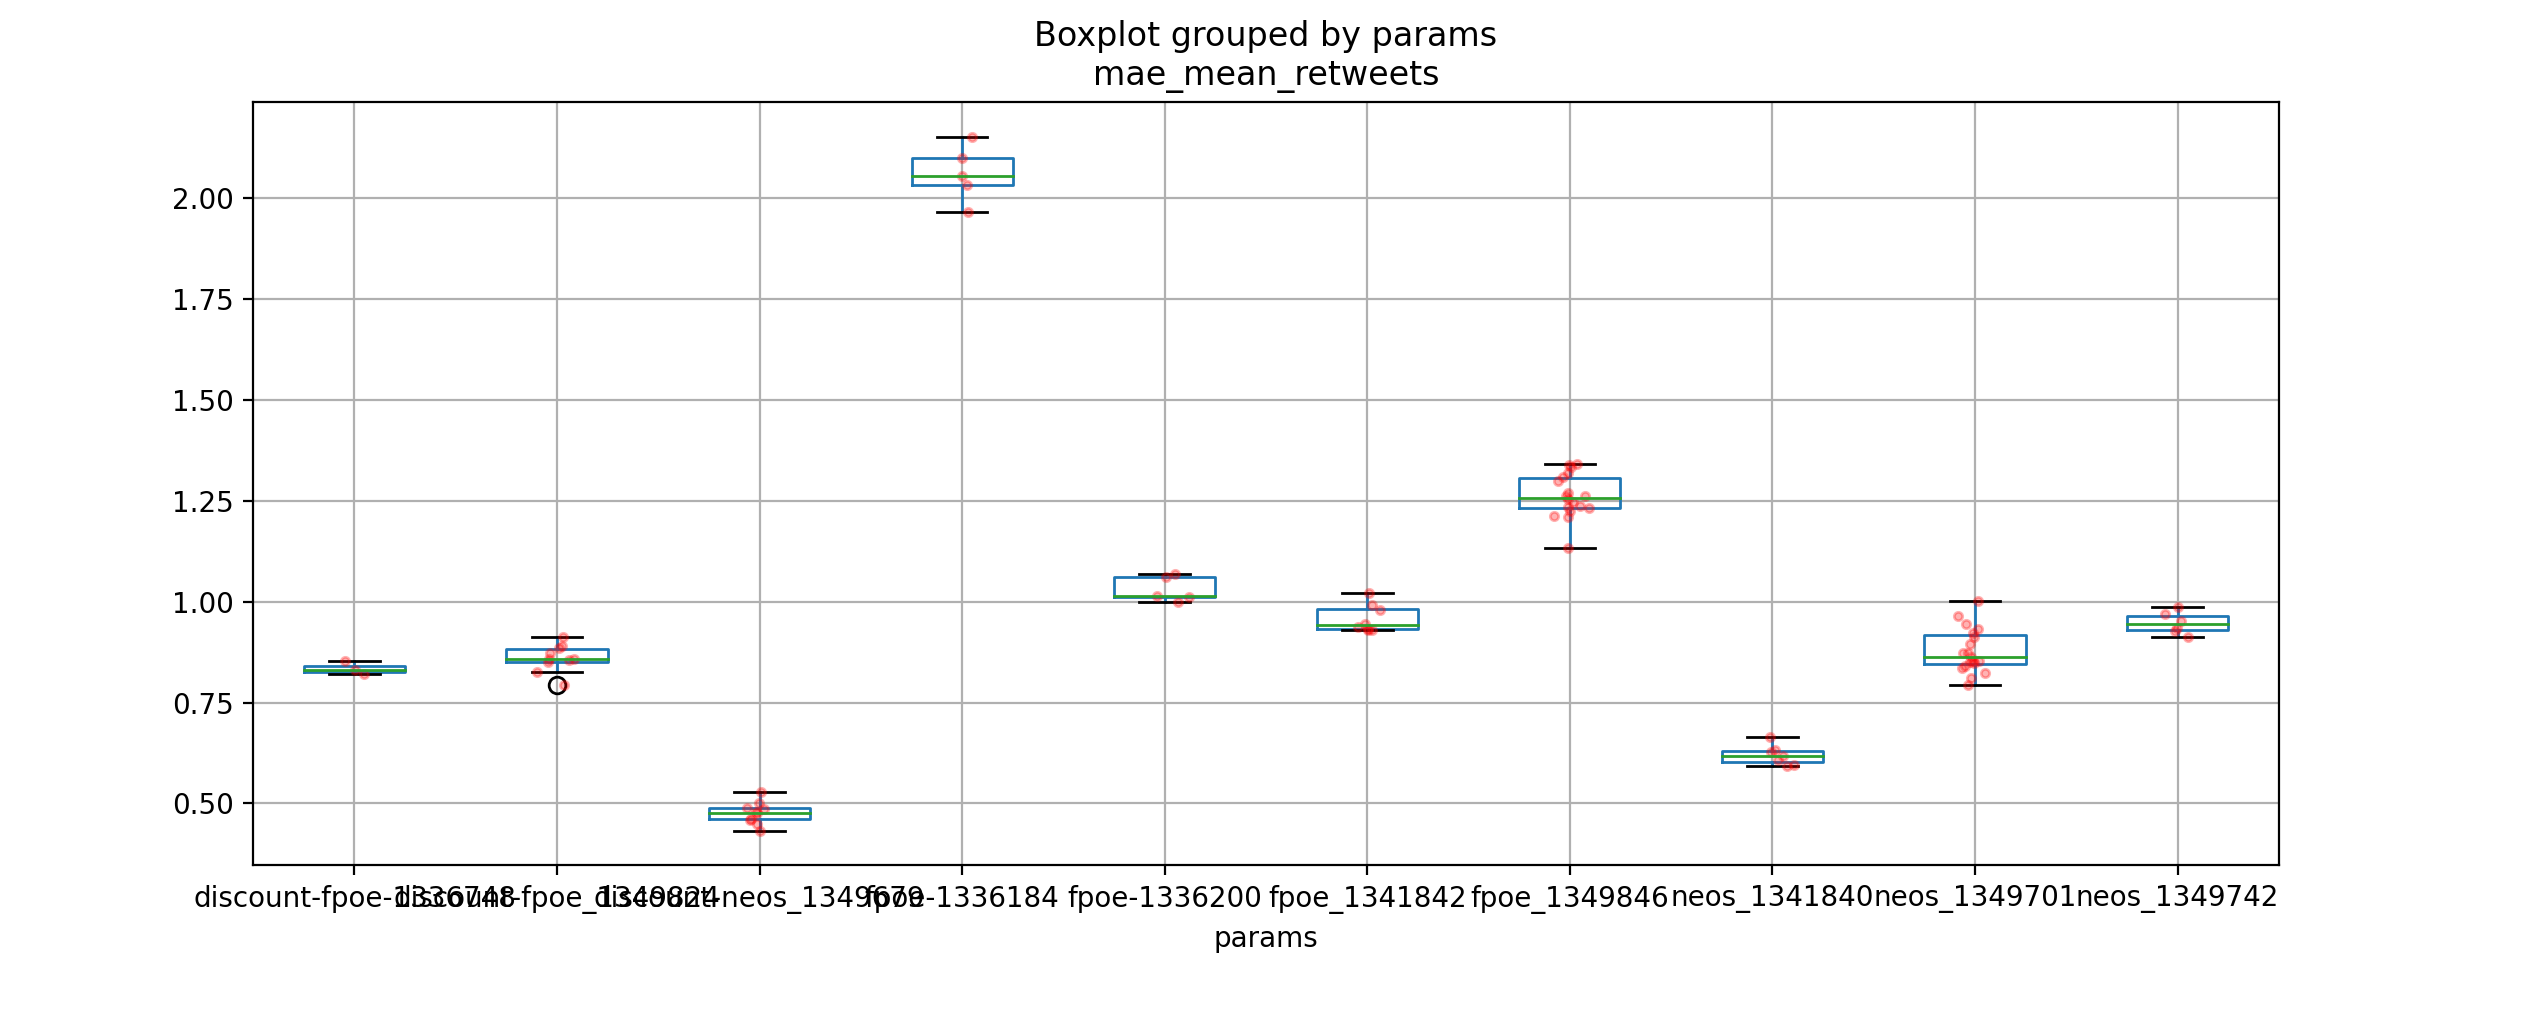

In [48]:
boxscatter(best,'params','mae_mean_retweets')

<AxesSubplot:title={'center':'mae_mean_retweets'}, xlabel='discount'>

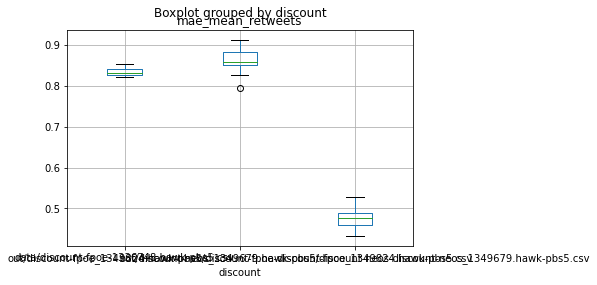

In [70]:
best.boxplot(column=['mae_mean_retweets'], by='')#,labels=newer.groupby('params').first().topic)
# newer.groupby('params').boxplot(column='mae_mean_retweets', subplots=False)


In [ ]:
r[r.command=='optimize'].graph

In [ ]:
p = r.pivot(index='nodes', columns='topic', values='runtime')
# p.to_csv('scaling.csv')

In [ ]:
p = r.pivot(index='nodes', columns='topic', values='mae_mean_retweets')
# p.to_csv('mae.csv')

jobid
1341840.hawk-pbs5                                                 None
1341841.hawk-pbs5    out/opt-neos_1341840.hawk-pbs5/params-neos-opt...
1341842.hawk-pbs5                                                 None
1341843.hawk-pbs5    out/opt-fpoe_1341842.hawk-pbs5/params-fpoe-opt...
1347816.hawk-pbs5    out/opt-neos_1341840.hawk-pbs5/params-neos-opt...
1347820.hawk-pbs5    out/opt-neos_1341840.hawk-pbs5/params-neos-opt...
1347821.hawk-pbs5    out/opt-neos_1341840.hawk-pbs5/params-neos-opt...
1347822.hawk-pbs5    out/opt-neos_1341840.hawk-pbs5/params-neos-opt...
1347823.hawk-pbs5    out/opt-neos_1341840.hawk-pbs5/params-neos-opt...
1347824.hawk-pbs5    out/opt-neos_1341840.hawk-pbs5/params-neos-opt...
1347826.hawk-pbs5    out/opt-fpoe_1341842.hawk-pbs5/params-fpoe-opt...
1347908.hawk-pbs5    out/opt-fpoe_1341842.hawk-pbs5/params-fpoe-opt...
1347909.hawk-pbs5    out/opt-fpoe_1341842.hawk-pbs5/params-fpoe-opt...
1347910.hawk-pbs5    out/opt-fpoe_1341842.hawk-pbs5/params-fpoe-opt...
